In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#load data
df = pd.read_csv('credit-g.csv')

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
df.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [6]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")


In [7]:
basic_info(df)

This dataset has  21  columns and  1000  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.4070

In [8]:
#checking for nan values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
 other_payment_plans      0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
 foreign_worker           0
class                     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

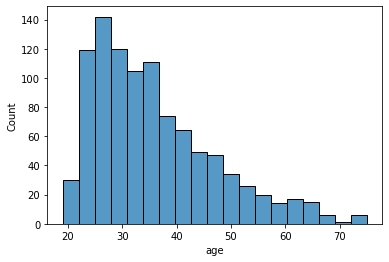

In [9]:
#lets plot histogram, boxplot to understand more about the age column
sns.histplot(df.age)

From histogram we can see the data to be slightly skewed towards right.

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

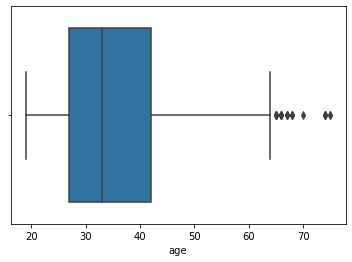

In [10]:
#boxplot
sns.boxplot(df.age)

There are outliers as well towards the right tail.

<AxesSubplot:xlabel='duration', ylabel='Count'>

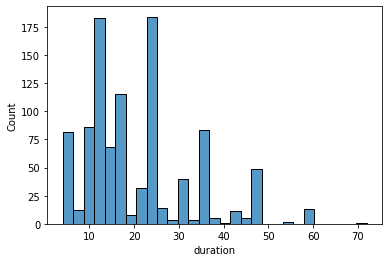

In [11]:
sns.histplot(df.duration)

From histogram we can see the data to be slightly skewed towards right.

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

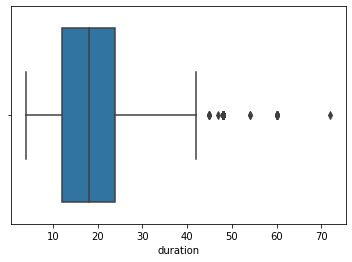

In [12]:
sns.boxplot(df.duration)

There's outliers as well towards the right tail.

In [13]:
#analyse job column now.
df.job.value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


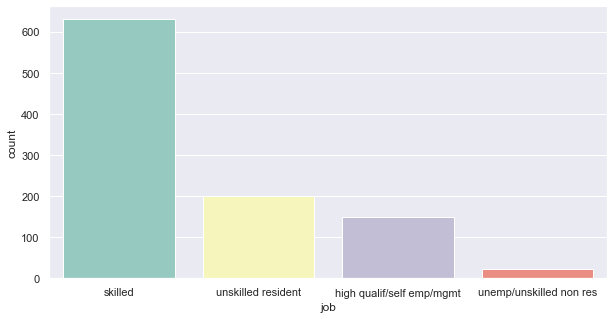

In [14]:
#plotting bar graph
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(df.job, palette="Set3")
plt.show()

In [15]:
#analyse housing column now.
df.housing.value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


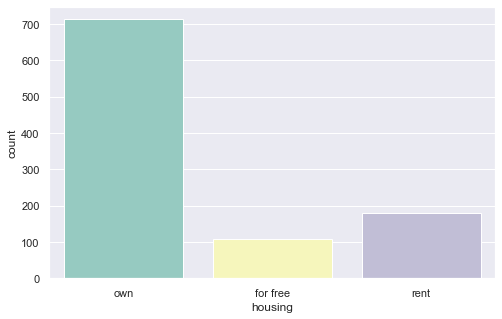

In [16]:
#plotting bar graph
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(df.housing, palette="Set3")
plt.show()

In [17]:
df.savings_status.value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

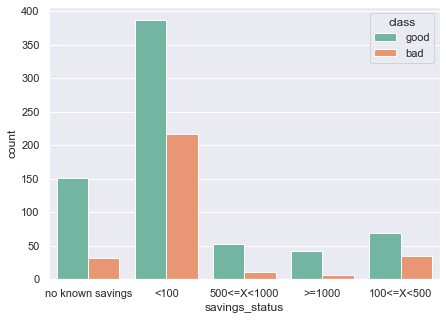

In [18]:
#plotting bar graph
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="savings_status", hue="class", data=df, palette="Set2")
plt.show()

In [19]:
df.credit_history.value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

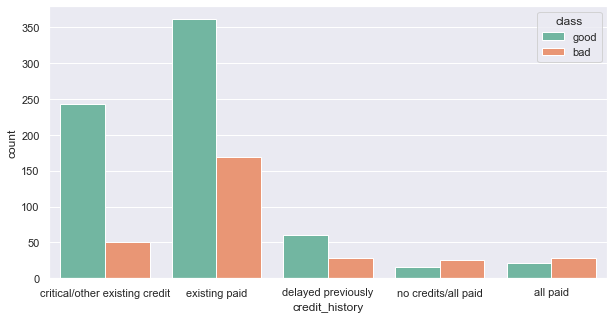

In [20]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="credit_history", hue="class", data=df, palette="Set2")
plt.show()

In [21]:
df['purpose'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

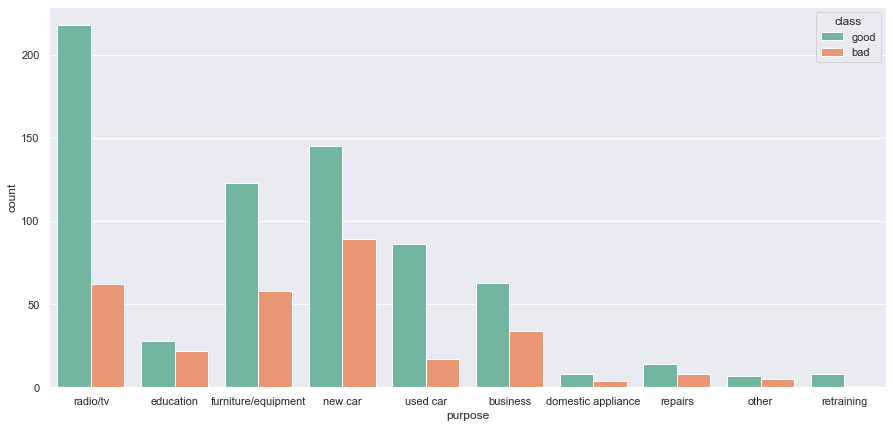

In [22]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="purpose", hue="class", data=df, palette="Set2")
plt.show()

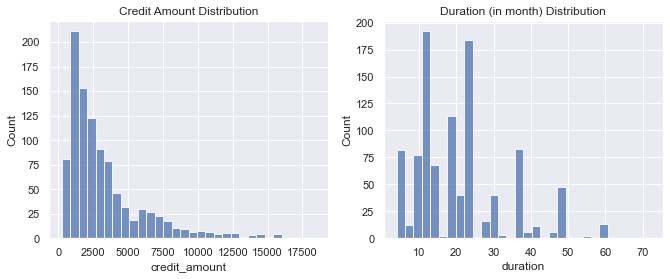

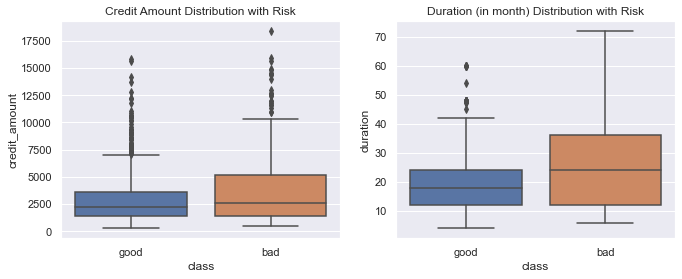

In [23]:
fig, ax = plt.subplots(1,2,figsize=(11,4))
sns.histplot(df, x='credit_amount', bins=30, ax=ax[0]).set_title("Credit Amount Distribution");
sns.histplot(df, x='duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(11,4))
sns.boxplot(data=df, x='class', y='credit_amount', ax=ax[0]).set_title("Credit Amount Distribution with Risk");
sns.boxplot(data=df, x='class', y='duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

The higher credit amount and longer duration means higher risk to the bank.

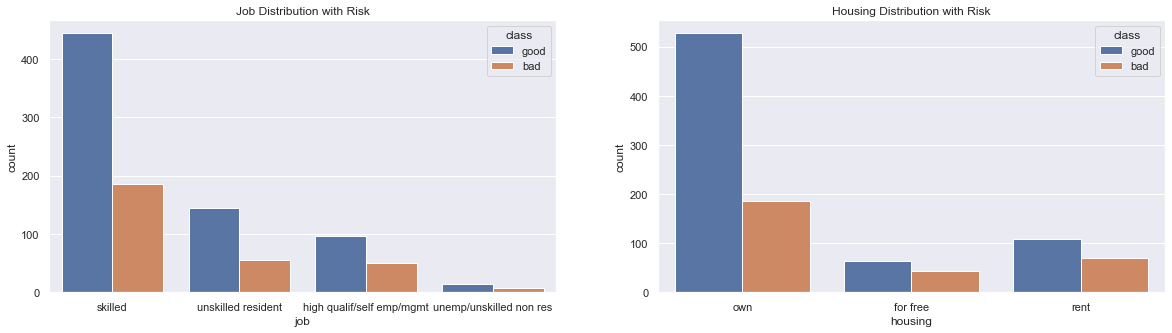

In [24]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=df, x="job", hue="class", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="housing", hue="class", ax=ax[1]).set_title("Housing Distribution with Risk");

#Most of people in records are skilled and have good rating.

#People who own a house means low risk and good rating to the bank.

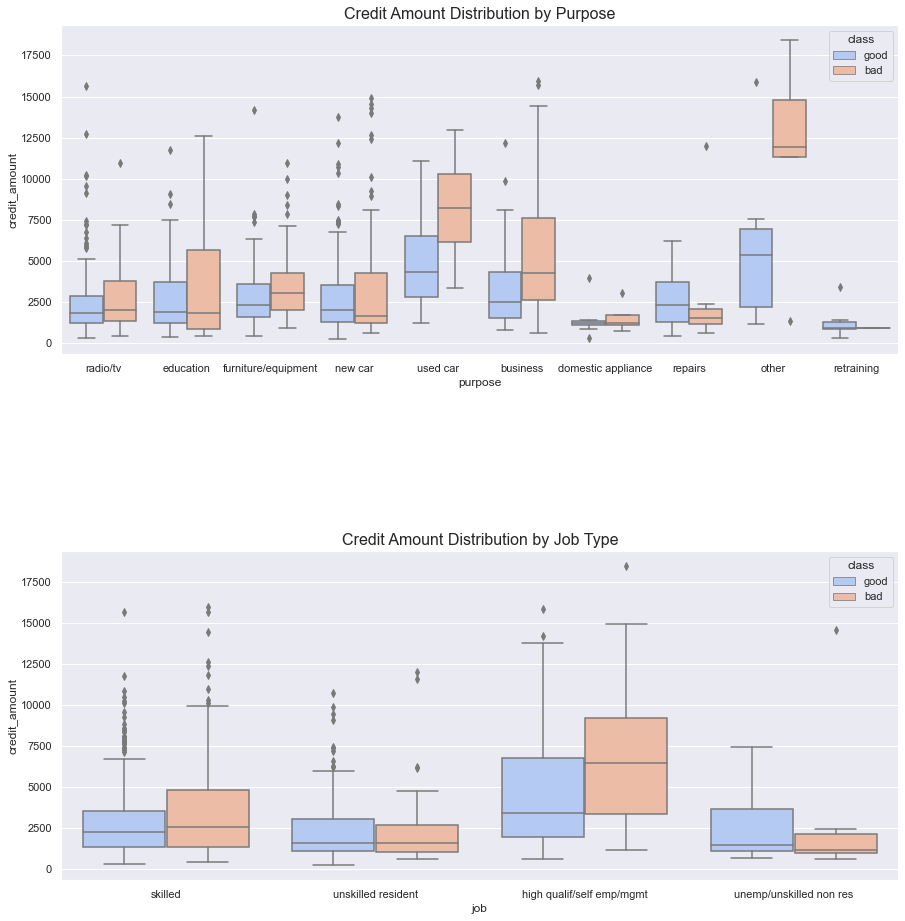

In [25]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,25))

sns.boxplot(x="purpose", y="credit_amount", data=df, hue="class", palette="coolwarm", ax=ax1)
sns.boxplot(x="job", y="credit_amount", data=df, hue="class", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

We notice quite a number of interesting things when we look at the 'Credit Amount Distribution by Purpose'. Firstly, we can see that certain 'purposes' are more likely to have 'bad'ratings, specially if the loan amount is high. For example, if we look at vacation/others, we can see that 'bad' rated loans usually consist of a higher amount. Same can be observed for business loans. Generally, if we exclude furniture/equipment and repairs categories, almost all other categories have a larger interquartile range when it comes to the credit amounts of 'bad' loans.

When it comes to job types, skilled workers tend to have a bigger and higher IQR for bad loans than for good loans. This makes sense since larger amounts are more likely to be classified as 'bad'. However, if we look at unskilled borrowers, this disparity doesn't hold true.

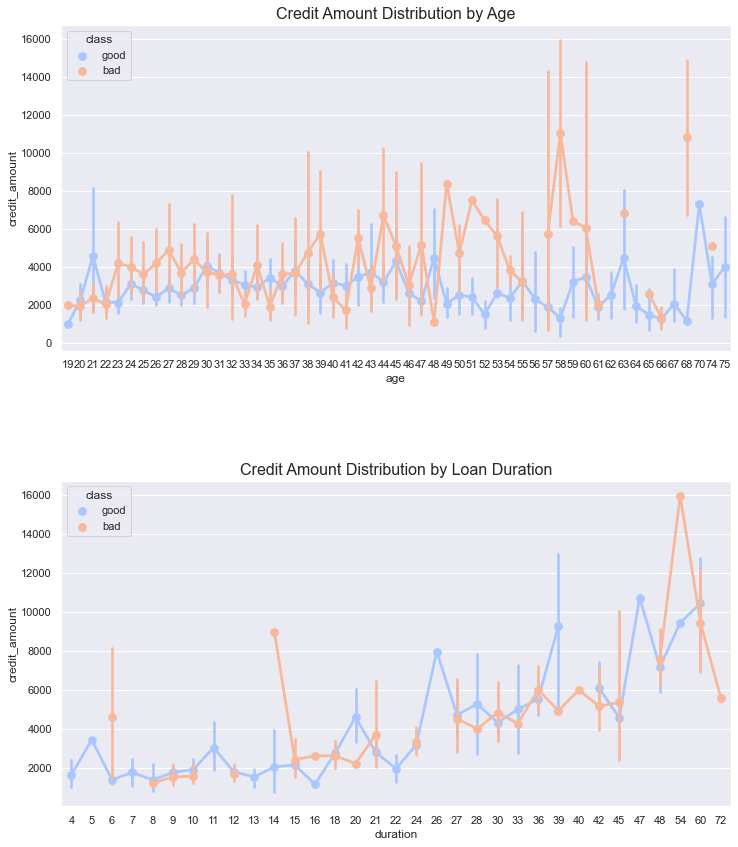

In [26]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,14))

sns.pointplot(x="age", y="credit_amount", data=df, hue="class", palette="coolwarm", ax=ax1)
sns.pointplot(x="duration", y="credit_amount", data=df, hue="class", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

We can see that generally, throughout all age gaps, bad loans tend to be of a higher amount but when it comes to people over 55, this gap widens.

We can see that when it comes to loan duration, bad and good loans amounts tend to move in tandem. Moreover, larger loans over a longer duration are more likely to be classified as 'good'.

Text(0.5, 0, 'age')

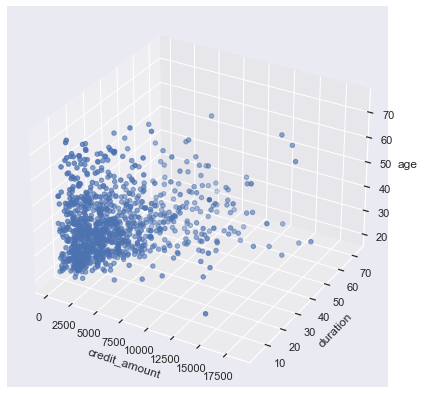

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["credit_amount"], df["duration"], df["age"])
ax.set_xlabel("credit_amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

In [28]:
date_int = ["purpose", 'personal_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

personal_status,female div/dep/mar,male div/sep,male mar/wid,male single
purpose,,,,
business,19,10,9,59
domestic appliance,6,1,1,4
education,21,1,1,27
furniture/equipment,74,15,7,85
new car,70,10,20,134
other,3,1,0,8
radio/tv,85,7,42,146
repairs,5,2,3,12
retraining,3,0,3,3


In [29]:
#categorical df handling into codes
df['own_telephone'] = df['own_telephone'].map({'none': 0, 'yes': 1}).astype(int)
df[' foreign_worker'] = df[' foreign_worker'].map({'no': 0, 'yes': 1}).astype(int)
df[' other_payment_plans'] = df[' other_payment_plans'].map({'none':0,'bank':1,'stores':2}).astype(int)
df['housing'] = df['housing'].map({'own':1,'for free':0,'rent':2}).astype(int)
df['job'] = df['job'].map({'skilled':1,'unskilled resident':0,'high qualif/self emp/mgmt':2,'unemp/unskilled non res':3}).astype(int)
df['property_magnitude'] = df['property_magnitude'].map({'real estate':1,'no known property':0,'life insurance':2,'car':3}).astype(int)
df['other_parties'] = df['other_parties'].map({'guarantor':1,'none':0,'co applicant':2}).astype(int)
df['personal_status'] = df['personal_status'].map({'male single':0, 'female div/dep/mar':1, 'male div/sep':2, 'male mar/wid':3}).astype(int)
df['checking_status'] = df['checking_status'].map({'<0':0, '0<=X<200':1, 'no checking':2, '>=200':3}).astype(int)
df['credit_history'] = df['credit_history'].map({'critical/other existing credit':0, 'existing paid':1,
                                                     'delayed previously':2, 'no credits/all paid':3, 'all paid':4}).astype(int)
df['purpose'] = df['purpose'].map({'radio/tv':0,'education':1,'furniture/equipment':2,'new car':3,'used car':4,
                                       'business':3, 'domestic appliance':4, 'repairs':5, 'other':6, 'retraining':7}).astype(int)
df['savings_status'] = df['savings_status'].map({'no known savings':0, '<100':1, '500<=X<1000':2, '>=1000':3,'100<=X<500':4}).astype(int)
df['employment'] = df['employment'].map({'>=7':1, '1<=X<4':2, '4<=X<7':3,'unemployed':0, '<1':4}).astype(int)
df['class'] = df['class'].map({'good':1, 'bad':0}).astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         1000 non-null   int32
 1   duration                1000 non-null   int64
 2   credit_history          1000 non-null   int32
 3   purpose                 1000 non-null   int32
 4   credit_amount           1000 non-null   int64
 5   savings_status          1000 non-null   int32
 6   employment              1000 non-null   int32
 7   installment_commitment  1000 non-null   int64
 8   personal_status         1000 non-null   int32
 9   other_parties           1000 non-null   int32
 10  residence_since         1000 non-null   int64
 11  property_magnitude      1000 non-null   int32
 12  age                     1000 non-null   int64
 13   other_payment_plans    1000 non-null   int32
 14  housing                 1000 non-null   int32
 15  existing_credits      

In [31]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6,0,0,1169,0,1,4,0,0,...,1,67,0,1,2,1,1,1,1,1
1,1,48,1,0,5951,1,2,2,1,0,...,1,22,0,1,1,1,1,0,1,0
2,2,12,0,1,2096,1,3,2,0,0,...,1,49,0,1,1,0,2,0,1,1
3,0,42,1,2,7882,1,3,2,0,1,...,2,45,0,0,1,1,2,0,1,1
4,0,24,2,3,4870,1,2,3,0,0,...,0,53,0,0,2,1,2,0,1,0


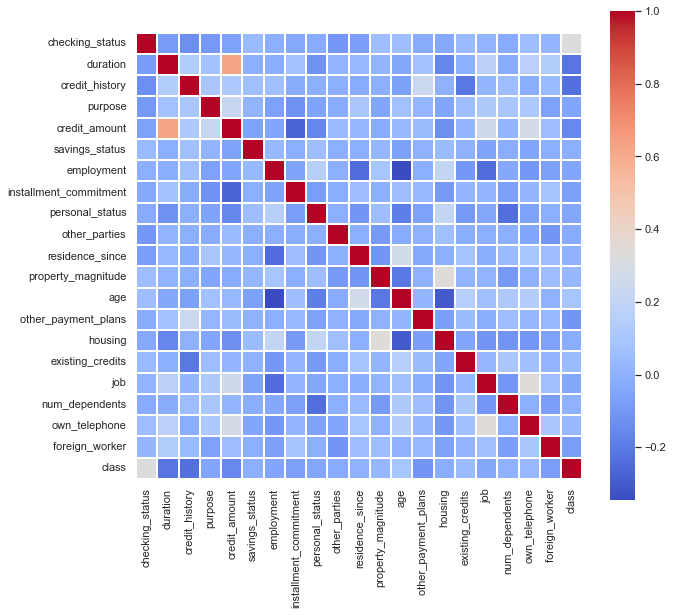

In [32]:
#looking at the correlation of the data
plt.figure(figsize=(10,9))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='coolwarm')
plt.show()

In [33]:
feature_cols = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age',
       ' other_payment_plans', 'housing', 'existing_credits', 'job',
       'num_dependents', 'own_telephone', ' foreign_worker']
X = df[feature_cols]
y = df["class"]

In [34]:
from sklearn.feature_selection import chi2,f_regression
scores,cpvalues = chi2(X,y)
p_df = pd.DataFrame()
p_df["features"] = feature_cols
p_df["p_val"] = cpvalues.round(3)
p_df

,features,p_val
0,checking_status,0.000
1,duration,0.000
2,credit_history,0.000
3,purpose,0.096
4,credit_amount,0.000
5,savings_status,0.648
6,employment,0.208
7,installment_commitment,0.138
8,personal_status,0.129
9,other_parties,0.274


The features having p-value less than 0.05 are: checking_status, Duration, credit_history, credit_amount, age, other_payment_plans

<AxesSubplot:xlabel='class', ylabel='count'>

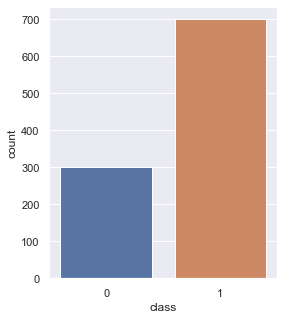

In [35]:
plt.figure(figsize = (9, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = df['class'], data = df)

In [36]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#These are for barplot in conclusion
method_names = []
method_scores = []


In [37]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((750, 20), (250, 20))

In [38]:
#transform the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [39]:
#oversampling of the imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('before Oversampling:',Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)
print('After Oversampling:',Counter(y_train))

before Oversampling: Counter({1: 522, 0: 228})
After Oversampling: Counter({1: 522, 0: 522})


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model

rfc.fit(X_train, y_train)

#Predict the Test set results

y_pred = rfc.predict(X_test)


In [41]:
# Check accuracy score 

method_names.append("Random Forest")
method_scores.append(rfc.score(X_test,y_test))

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.7640


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        72
           1       0.82      0.86      0.84       178

    accuracy                           0.76       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.76      0.76      0.76       250



<AxesSubplot:>

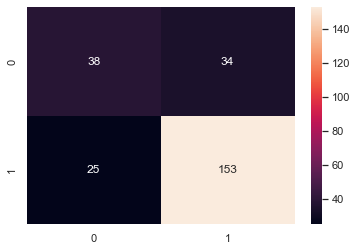

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

# SVM Classifier

In [44]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)

In [45]:
method_names.append("SVM")
method_scores.append(svm.score(X_test,y_test))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

Model accuracy score: 0.7360


In [46]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        72
           1       0.84      0.78      0.81       178

    accuracy                           0.74       250
   macro avg       0.69      0.70      0.69       250
weighted avg       0.75      0.74      0.74       250



<AxesSubplot:>

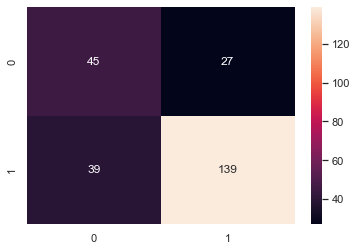

In [47]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='g')

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model. 
logreg = LogisticRegression() 

# Training the model. 
logreg.fit(X_train,y_train)

# Do prediction. 
y_pred_reg=logreg.predict(X_test)

In [49]:
method_names.append("Logistic Regression")
method_scores.append(logreg.score(X_test,y_test))

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_reg)))

Model accuracy score : 0.6800


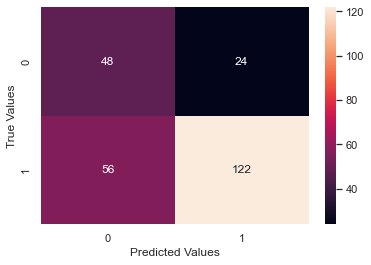

In [50]:
cm = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

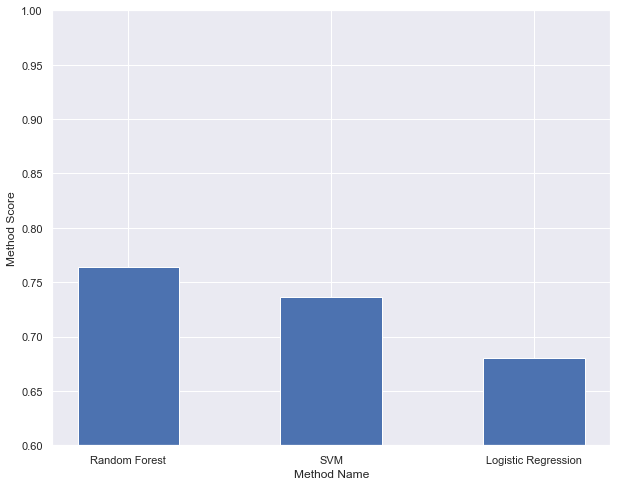

In [51]:
plt.figure(figsize=(10,8))
plt.ylim([0.60,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')